In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tclab

print("Version = ", tclab.__version__)
tclab.diagnose()

Version =  0.4.9

Checking connection
-------------------
Looking for Arduino on any port...
Arduino Leonardo found on port COM3

Testing TCLab object in debug mode
----------------------------------
TCLab version 0.4.9
Sent: "Q1 0"
Return: "0.000"
Sent: "VER"
Return: "TCLab Firmware 3.0.0 Arduino Leonardo/Micro"
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Sent: "Q2 0"
Return: "0.000"
Reading temperature
Sent: "T1"
Return: "18.320"
18.32
Sent: "Q1 0"
Return: "0.000"
Sent: "Q2 0"
Return: "0.000"
Sent: "X"
Return: "Stop"
TCLab disconnected successfully.

Testing TCLab functions
-----------------------
TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Testing LED. Should turn on for 10 seconds.
Countdown: 0  

Reading temperatures
T1 = 18.32 °C, T2 = 18.224 °C

Writing fractional value to heaters...
We wrote Q1 = 0.5, and read back Q1 = 0.5

We will now turn on t

Text(0, 0.5, '% Max Power')

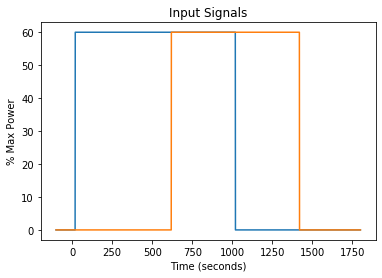

In [3]:
# Define functions for u1(t) and u2(t) using interpolation

t1_expt = [20,20,1020,1020]

u1_expt = [0,60,60,0]

t2_expt = [620,620,1420,1420]

u2_expt = [0,60,60,0]

def u1(t):
    return np.interp(t, t1_expt, u1_expt)

def u2(t):
    return np.interp(t, t2_expt, u2_expt)

time=np.linspace(-100,1800,1901)

plt.plot(time,u1(time))
plt.plot(time,u2(time))
plt.title('Input Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('% Max Power')

TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


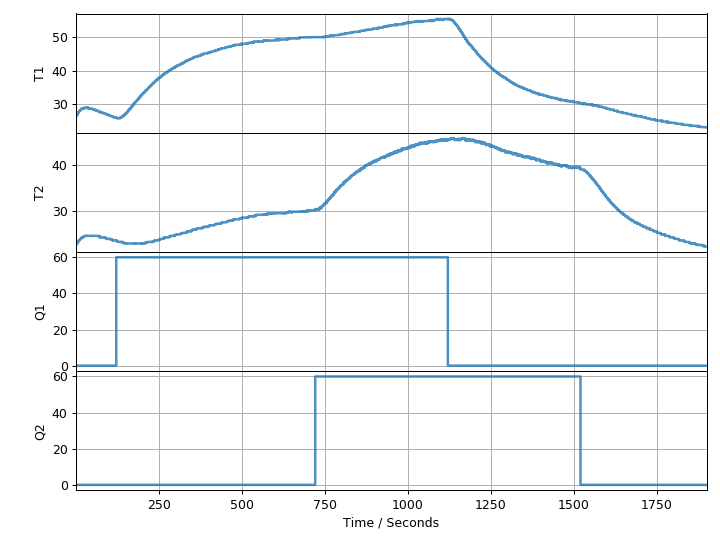

TCLab disconnected successfully.


In [4]:
# Collect the data and plot the results

%matplotlib notebook

from tclab import TCLab, clock, Historian, Plotter

P1=200
P2=100

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, 1900)
    for t in clock(1900):
        x=t-100 
        lab.Q1(0 if t<=100 else u1(x))
        lab.Q2(0 if t<=100 else u2(x))
        p.update(t)
   
        
h.to_csv('data_lab2.csv')